1. (2 points) Using the techniques we have learned in class so far (i.e. DON’T use groupby() method),
create a dataframe that shows the number of visits to Heavenly Chocoloate’s website using different
browsers. Your output should be similar to the following table.

In [7]:
import pandas as pd
import numpy as np

In [39]:
df=pd.read_csv('HeavenlyChocolates.csv')
df

,Customer,Day,Browser,Time,Pages_Viewed,Amount_Spent
0,1,Mon,Chrome,12.0,4,54.52
1,2,Wed,Other,19.5,6,94.90
2,3,Mon,Chrome,8.5,4,26.68
3,4,Tue,Firefox,11.4,2,44.73
4,5,Wed,Chrome,11.3,4,66.27
5,6,Sat,Firefox,10.5,6,67.80
6,7,Sun,Chrome,11.4,2,36.04
7,8,Fri,Firefox,4.3,6,55.96
8,9,Wed,Firefox,12.7,3,70.94
9,10,Tue,Chrome,24.7,7,68.73


In [40]:
Browsers=df['Browser'].unique()
Times=[0]*len(Browsers)
for i in np.arange(0,len(Browsers)):
    Times[i]=sum(df['Browser']==Browsers[i])

BrowserCount=pd.DataFrame({'Browser':Browsers, 'Count':Times})
BrowserCount=BrowserCount.sort_values('Count',ascending=False).reset_index(drop=True)
BrowserCount

,Browser,Count
0,Chrome,27
1,Firefox,16
2,Other,7


2. (2 points) Create a duplicate of the following graph to show which browser is used more by the
Heavenly Chocolate website visitors? The dashed line represents the mean of count visits for all browsers
in the dataset.


In [22]:
import matplotlib.pyplot as plt

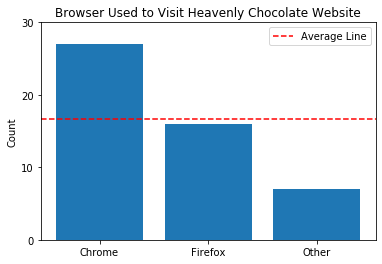

In [34]:
plt.bar('Browser','Count',data=BrowserCount)
plt.ylabel('Count')
plt.title('Browser Used to Visit Heavenly Chocolate Website')
plt.ylim((0,30))
plt.yticks(np.arange(0,31,10))
plt.axhline(y=BrowserCount['Count'].mean(),linestyle='--',color='red',label='Average Line')
plt.legend(loc=1)
plt.show()

Answer: Chrome is used the most, far above average.

3. (2 points)Create an duplicate of the following scatterplot that shows the relationship between the
time spent browsing, and the amount spent buying using either Firefox or Chrome browswers. What
does this plot tell you about the company’s revenues using both channels?

In [46]:
Chrome=df[df['Browser']=='Chrome']
FireFox=df[df['Browser']=='Firefox']

Text(0.5, 1.0, 'Relationship between time spent browsing and amount Spent')

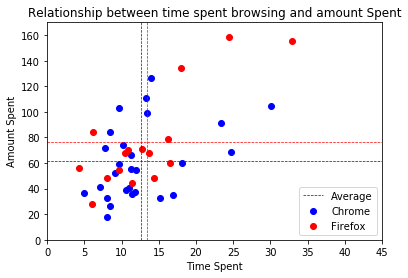

In [76]:
plt.scatter('Time','Amount_Spent',data=Chrome,color='blue',label='Chrome')
plt.scatter('Time','Amount_Spent',data=FireFox,color='red',label='Firefox')
plt.axvline(x=Chrome['Time'].mean(),linestyle='--',color='blue',linewidth=0.7,label='Average')
plt.axvline(x=FireFox['Time'].mean(),linestyle='--',color='red',linewidth=0.7)
plt.axhline(y=Chrome['Amount_Spent'].mean(),linestyle='--',color='blue',linewidth=0.7)
plt.axhline(y=FireFox['Amount_Spent'].mean(),linestyle='--',color='red',linewidth=0.7)
plt.ylim((0,170))
plt.xlim((0,45))
plt.legend(loc=4)
plt.xlabel('Time Spent')
plt.ylabel('Amount Spent')
plt.title('Relationship between time spent browsing and amount Spent')

Answer: Generally as browsing time increases the amount spent(Revenue) tends to be higher for both browsers. Average time and revenue for Firefox are higher than those of Chrome, indicating that Firefox attracts more views and sales.

4. (2 points) Create the following chart which shows the number of website visitors per day for people
using Chrome or Firefox.


In [80]:
Week=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
ChromeCount=[1]*len(Week)
FireFoxCount=[1]*len(Week)
for i in np.arange(len(Week)):
    ChromeCount[i]=sum(Chrome['Day']==Week[i])
    FireFoxCount[i]=sum(FireFox['Day']==Week[i])

ChromeTable=pd.DataFrame({'Day':Week,'Count':ChromeCount})
FireFoxTable=pd.DataFrame({'Day':Week,'Count':FireFoxCount})
    
    

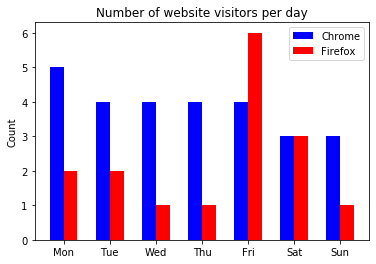

In [97]:
pos=np.arange(len(Week))
width=0.3
plt.bar(pos-width/2,ChromeCount,width=width,label='Chrome',color='blue')
plt.bar(pos+width/2,FireFoxCount,width=width,label='Firefox',color='red')
ax=plt.gca()
ax.set_xticklabels(['']+Week)
plt.ylabel('Count')
plt.title('Number of website visitors per day')
plt.legend(loc=1)
plt.show()